In [23]:
# Шаг 1: Загрузка данных

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Загрузка набора данных из заданного пути
data_path = '/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv'
data = pd.read_csv(data_path)

# Вывод первых пяти строк данных
print("Первые пять строк набора данных:")
print(data.head())


Первые пять строк набора данных:
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                        


Форма набора данных: (32581, 12)

Типы данных и количество ненулевых значений:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float

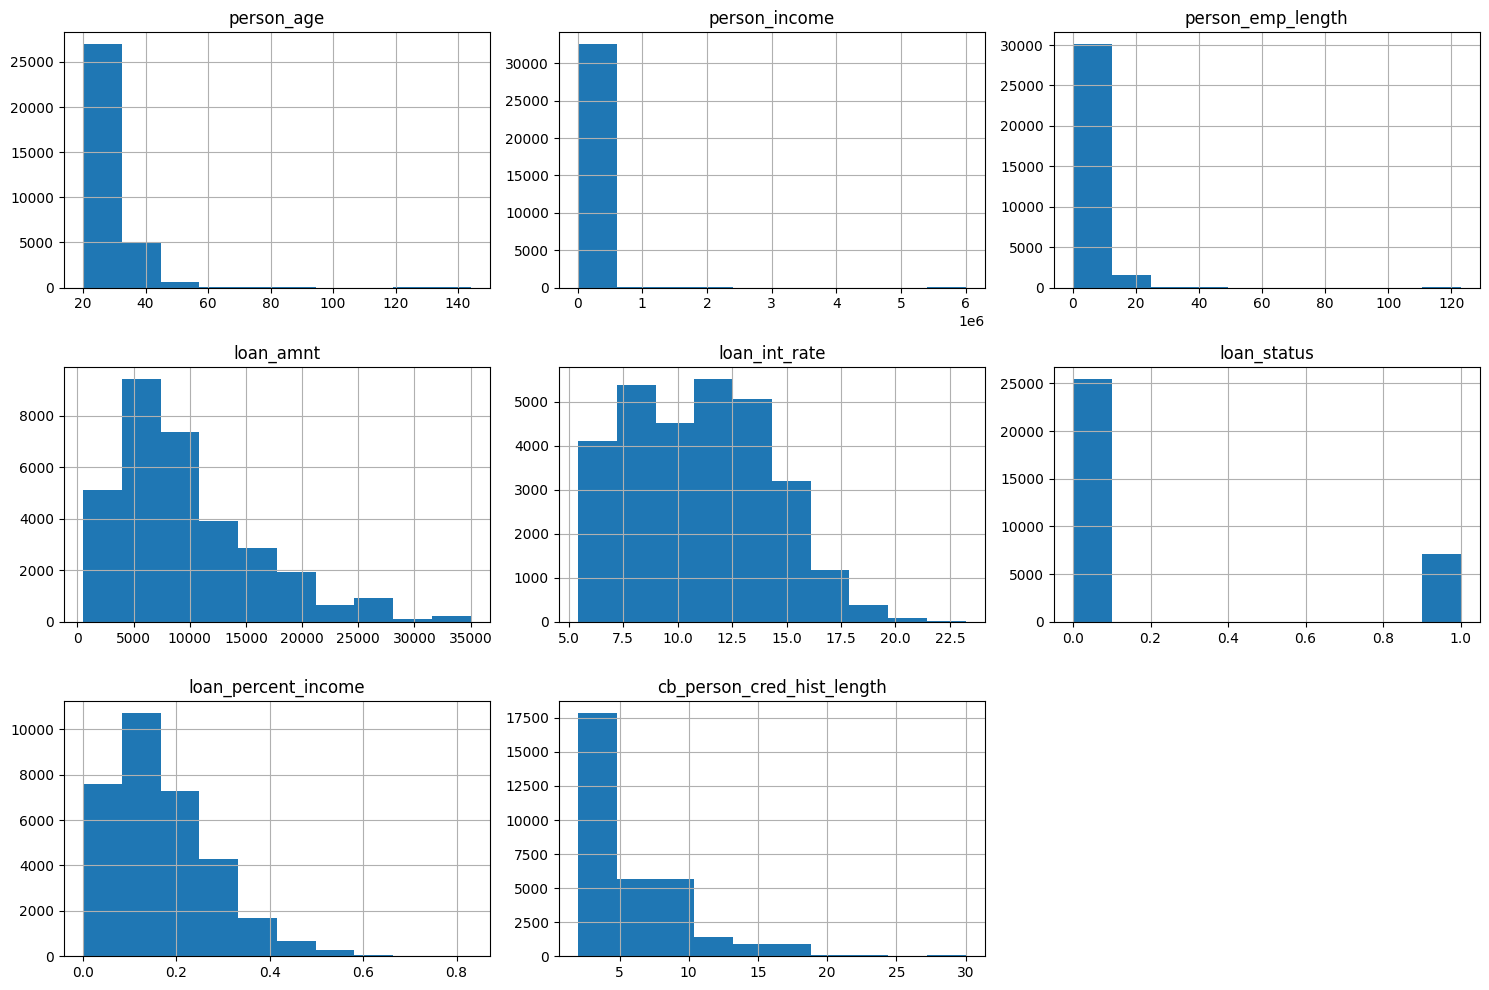

Гистограммы показывают распределение каждого числового признака. Можно заметить, что некоторые признаки имеют смещенное распределение или выбросы.


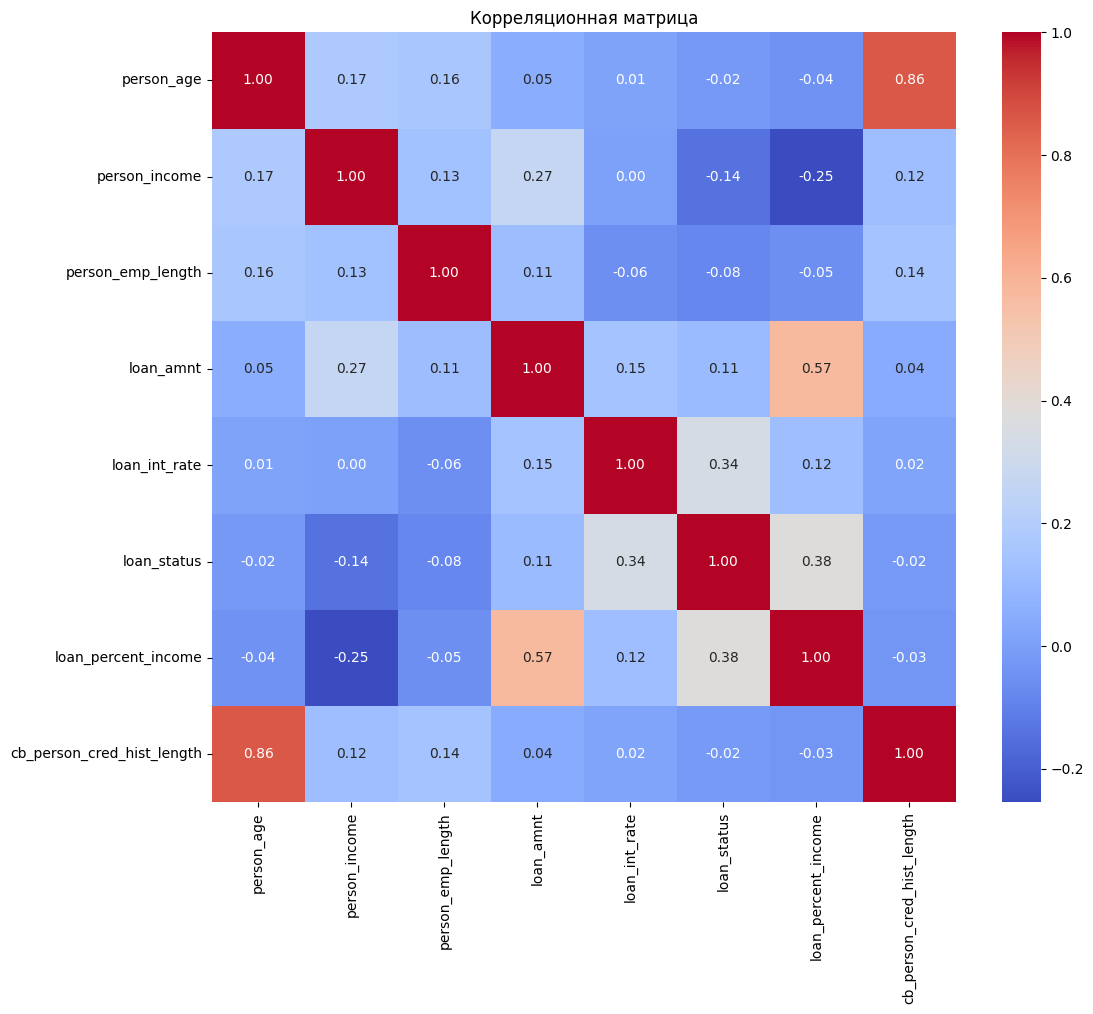

Корреляционная матрица показывает степень связи между различными признаками. Значения близкие к 1 или -1 указывают на сильную положительную или отрицательную корреляцию соответственно.


In [24]:
# Шаг 2: Исследовательский анализ данных

# Получаем основную информацию о наборе данных
print("\nФорма набора данных:", data.shape)
print("\nТипы данных и количество ненулевых значений:")
print(data.info())

# Статистическое описание числовых столбцов
print("\nСтатистическое описание числовых столбцов:")
print(data.describe())

# Интерпретация статистического описания
print("\nИнтерпретация статистического описания:")
print("Среднее значение для каждого числового признака, стандартное отклонение, минимальные и максимальные значения позволяют понять распределение данных.")
print("Например, средний возраст заемщиков составляет {:.2f} лет.".format(data['person_age'].mean()))
print("Средний доход составляет {:.2f}.".format(data['person_income'].mean()))
print("Необходимо обратить внимание на признаки с большим разбросом, чтобы понять возможные выбросы.")

# Проверка наличия пропущенных значений
print("\nКоличество пропущенных значений в каждом столбце:")
print(data.isnull().sum())

# Визуализация распределения числовых признаков
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Построение гистограмм
data[numerical_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Интерпретация гистограмм
print("Гистограммы показывают распределение каждого числового признака. Можно заметить, что некоторые признаки имеют смещенное распределение или выбросы.")

# Корреляционная матрица
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data[numerical_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# Интерпретация корреляционной матрицы
print("Корреляционная матрица показывает степень связи между различными признаками. Значения близкие к 1 или -1 указывают на сильную положительную или отрицательную корреляцию соответственно.")


In [25]:
# Шаг 3: Обработка пропущенных значений

# Проверяем снова наличие пропущенных значений
print("\nКоличество пропущенных значений в каждом столбце:")
print(data.isnull().sum())

# Если есть пропущенные значения, заполняем их
if data.isnull().sum().sum() > 0:
    # Для числовых столбцов заполняем медианой
    numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
    data[numerical_features] = data[numerical_features].fillna(data[numerical_features].median())
    
    # Для категориальных столбцов заполняем модой
    categorical_features = data.select_dtypes(include=['object']).columns
    data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])
    
    # Проверяем, что пропущенных значений нет
    print("\nПосле обработки пропущенных значений:")
    print(data.isnull().sum())
else:
    print("\nПропущенных значений в наборе данных нет.")


Количество пропущенных значений в каждом столбце:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

После обработки пропущенных значений:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [26]:
# Шаг 4: Обработка категориальных переменных

# Список категориальных признаков
categorical_features = data.select_dtypes(include=['object']).columns
print("\nКатегориальные признаки:", categorical_features.tolist())

# Вывод уникальных значений для каждого категориального признака
for col in categorical_features:
    print(f"\nУникальные значения в столбце '{col}':")
    print(data[col].unique())

# Преобразуем категориальные переменные в числовые с помощью One-Hot Encoding
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Проверяем новые столбцы
print("\nСтолбцы после кодирования:")
print(data.columns.tolist())



Категориальные признаки: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

Уникальные значения в столбце 'person_home_ownership':
['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Уникальные значения в столбце 'loan_intent':
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Уникальные значения в столбце 'loan_grade':
['D' 'B' 'C' 'A' 'E' 'F' 'G']

Уникальные значения в столбце 'cb_person_default_on_file':
['Y' 'N']

Столбцы после кодирования:
['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y']


In [27]:
# Шаг 5: Нормализация данных

from sklearn.preprocessing import StandardScaler

# Инициализируем StandardScaler
scaler = StandardScaler()

# Идентифицируем числовые признаки (исключая целевую переменную)
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('loan_status')  # Замените 'loan_status' на название вашей целевой переменной, если она числовая

# Применяем нормализацию к числовым признакам
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Выводим первые пять строк после нормализации
print("\nДанные после нормализации:")
print(data.head())



Данные после нормализации:
   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0   -0.903374      -0.114143          28.926614   4.019404       1.625921   
1   -1.060904      -0.911147           0.056763  -1.358650       0.042310   
2   -0.430783      -0.911147          -0.921876  -0.646849       0.603713   
3   -0.745843      -0.009274          -0.187897   4.019404       1.369558   
4   -0.588313      -0.188358           0.790742   4.019404       1.058028   

   loan_status  loan_percent_income  cb_person_cred_hist_length  \
0            1             3.931411                   -0.691554   
1            0            -0.657458                   -0.938167   
2            1             3.744110                   -0.691554   
3            1             3.369508                   -0.938167   
4            1             3.556809                   -0.444942   

   person_home_ownership_OTHER  person_home_ownership_OWN  ...  \
0                        False          

In [28]:
# Шаг 6: Разделение данных на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split

# Предположим, что целевая переменная называется 'loan_status'
target = 'loan_status'

# Разделяем признаки и целевую переменную
X = data.drop(target, axis=1)
y = data[target]

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nРазмер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)


Размер обучающей выборки: (22806, 22)
Размер тестовой выборки: (9775, 22)


In [29]:
# Шаг 7: Применение классификатора k-NN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Инициализируем классификатор
knn = KNeighborsClassifier()

# Обучаем модель
knn.fit(X_train, y_train)

# Предсказываем на тестовой выборке
y_pred = knn.predict(X_test)

# Оцениваем модель
accuracy = accuracy_score(y_test, y_pred)
print("\nТочность классификатора k-NN:", accuracy)

print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred))

print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred))


Точность классификатора k-NN: 0.8881841432225064

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7613
           1       0.83      0.62      0.71      2162

    accuracy                           0.89      9775
   macro avg       0.87      0.79      0.82      9775
weighted avg       0.88      0.89      0.88      9775


Матрица ошибок:
[[7341  272]
 [ 821 1341]]


In [30]:
# Шаг 8: Подбор гиперпараметров

from sklearn.model_selection import GridSearchCV

# Определяем сетку параметров
param_grid = {'n_neighbors': range(1, 31)}

# Инициализируем GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Обучаем модель
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("\nЛучшие параметры по результатам GridSearchCV:")
print(grid_search.best_params_)

# Лучшая модель
best_knn = grid_search.best_estimator_

# Оцениваем лучшую модель на тестовой выборке
y_pred_best = best_knn.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print("\nТочность лучшего классификатора k-NN:", accuracy_best)

print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred_best))

print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred_best))



Лучшие параметры по результатам GridSearchCV:
{'n_neighbors': 15}

Точность лучшего классификатора k-NN: 0.8898209718670077

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7613
           1       0.86      0.60      0.71      2162

    accuracy                           0.89      9775
   macro avg       0.88      0.78      0.82      9775
weighted avg       0.89      0.89      0.88      9775


Матрица ошибок:
[[7410  203]
 [ 874 1288]]


In [31]:
# Шаг 9: Вычисление ошибок на обучающей и тестовой выборках

# Предсказания на обучающей выборке
y_train_pred = best_knn.predict(X_train)

# Точность на обучающей выборке
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\nТочность на обучающей выборке:", train_accuracy)

# Точность на тестовой выборке
print("Точность на тестовой выборке:", accuracy_best)

# Вычисление ошибок
train_error = 1 - train_accuracy
test_error = 1 - accuracy_best

print("\nОшибка на обучающей выборке:", train_error)
print("Ошибка на тестовой выборке:", test_error)

# Выводы
if test_error > train_error:
    print("\nМодель может быть переобучена на обучающих данных.")
elif test_error < train_error:
    print("\nМодель хорошо обобщает на новых данных.")
else:
    print("\nМодель показывает одинаковую производительность на обучающей и тестовой выборках.")



Точность на обучающей выборке: 0.8988862580022801
Точность на тестовой выборке: 0.8898209718670077

Ошибка на обучающей выборке: 0.10111374199771994
Ошибка на тестовой выборке: 0.1101790281329923

Модель может быть переобучена на обучающих данных.


In [32]:
# Шаг 10: Пробуем другие классификаторы

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Логистическая регрессия
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("\nТочность Логистической регрессии:", accuracy_lr)

# Дерево решений
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Точность Дерева решений:", accuracy_dt)

# Случайный лес
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Точность Случайного леса:", accuracy_rf)

# Метод опорных векторов
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("Точность Метода опорных векторов:", accuracy_svc)

# Сравнение точностей
accuracies = {
    'k-NN': accuracy_best,
    'Логистическая регрессия': accuracy_lr,
    'Дерево решений': accuracy_dt,
    'Случайный лес': accuracy_rf,
    'Метод опорных векторов': accuracy_svc
}

print("\nСравнение точностей классификаторов:")
for classifier, acc in accuracies.items():
    print(f"{classifier}: {acc:.4f}")


Точность Логистической регрессии: 0.8648593350383632
Точность Дерева решений: 0.8881841432225064
Точность Случайного леса: 0.9301278772378516
Точность Метода опорных векторов: 0.9108951406649617

Сравнение точностей классификаторов:
k-NN: 0.8898
Логистическая регрессия: 0.8649
Дерево решений: 0.8882
Случайный лес: 0.9301
Метод опорных векторов: 0.9109



Распределение классов в целевой переменной:
loan_status
0    25473
1     7108
Name: count, dtype: int64


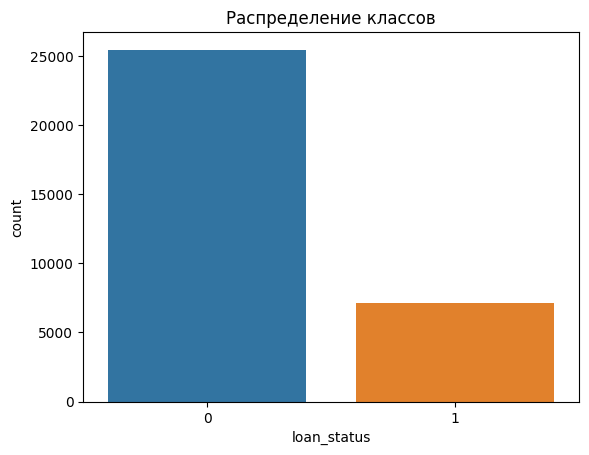


После применения SMOTE:
Размер обучающей выборки после балансировки: (35720, 22)
Распределение классов после балансировки:
loan_status
1    17860
0    17860
Name: count, dtype: int64

Точность после применения SMOTE: 0.8165728900255754

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      7613
           1       0.56      0.78      0.65      2162

    accuracy                           0.82      9775
   macro avg       0.75      0.80      0.76      9775
weighted avg       0.85      0.82      0.83      9775


Матрица ошибок:
[[6300 1313]
 [ 480 1682]]


In [33]:
# Шаг 11: Борьба с несбалансированностью классов

# Проверяем распределение классов
print("\nРаспределение классов в целевой переменной:")
print(y.value_counts())

# Визуализируем распределение классов
sns.countplot(x=y)
plt.title('Распределение классов')
plt.show()

# Если классы несбалансированы, применяем SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("\nПосле применения SMOTE:")
print("Размер обучающей выборки после балансировки:", X_resampled.shape)
print("Распределение классов после балансировки:")
print(pd.Series(y_resampled).value_counts())

# Повторно обучаем модель на сбалансированных данных
best_knn.fit(X_resampled, y_resampled)

# Предсказываем на тестовой выборке
y_pred_smote = best_knn.predict(X_test)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
print("\nТочность после применения SMOTE:", accuracy_smote)

print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred_smote))

print("\nМатрица ошибок:")
print(confusion_matrix(y_test, y_pred_smote))

In [36]:
# Шаг 12: Исключение коррелированных переменных

# 1. Вычисляем корреляционную матрицу для всех признаков
corr_matrix = X.corr().abs()

# 2. Выбираем верхний треугольник матрицы корреляций
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 3. Находим признаки с высокой корреляцией (коэффициент корреляции > 0.9)
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]

print("\nПризнаки с высокой корреляцией (корреляция > 0.9):")
print(high_corr_features)

# Объяснение:
print("\nМы исключаем сильно коррелированные признаки, чтобы уменьшить мультиколлинеарность в данных. Высокая корреляция между признаками может привести к тому, что модель будет переоценивать влияние этих признаков, что может негативно сказаться на производительности модели и ее способности обобщать на новые данные.")

# 4. Исключаем сильно коррелированные признаки из набора данных
X_reduced = X.drop(columns=high_corr_features)

# 5. Разделяем уменьшенный набор данных на обучающую и тестовую выборки
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(
    X_reduced, y, test_size=0.3, random_state=42)

# 6. Обучаем модель на уменьшенном наборе данных
best_knn.fit(X_train_reduced, y_train_reduced)

# 7. Предсказываем на тестовой выборке
y_pred_reduced = best_knn.predict(X_test_reduced)

# 8. Оцениваем точность модели после удаления коррелированных признаков
accuracy_reduced = accuracy_score(y_test_reduced, y_pred_reduced)
print("\nТочность после удаления коррелированных признаков:", accuracy_reduced)

# 9. Выводим отчет о классификации и матрицу ошибок
print("\nОтчет о классификации после удаления коррелированных признаков:")
print(classification_report(y_test_reduced, y_pred_reduced))

print("\nМатрица ошибок после удаления коррелированных признаков:")
print(confusion_matrix(y_test_reduced, y_pred_reduced))



Признаки с высокой корреляцией (корреляция > 0.9):
[]

Мы исключаем сильно коррелированные признаки, чтобы уменьшить мультиколлинеарность в данных. Высокая корреляция между признаками может привести к тому, что модель будет переоценивать влияние этих признаков, что может негативно сказаться на производительности модели и ее способности обобщать на новые данные.

Точность после удаления коррелированных признаков: 0.8898209718670077

Отчет о классификации после удаления коррелированных признаков:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7613
           1       0.86      0.60      0.71      2162

    accuracy                           0.89      9775
   macro avg       0.88      0.78      0.82      9775
weighted avg       0.89      0.89      0.88      9775


Матрица ошибок после удаления коррелированных признаков:
[[7410  203]
 [ 874 1288]]


In [37]:
from sklearn.decomposition import PCA

# Выбираем количество компонент для сохранения (например, объясняющих 95% дисперсии)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)

print(f"После применения PCA количество признаков сократилось с {X.shape[1]} до {X_pca.shape[1]}.")

# Разделяем данные на обучающую и тестовую выборки
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.3, random_state=42)

# Обучаем модель на данных после PCA
best_knn.fit(X_train_pca, y_train_pca)

# Предсказываем на тестовой выборке
y_pred_pca = best_knn.predict(X_test_pca)

# Оцениваем точность модели
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
print("\nТочность после применения PCA:", accuracy_pca)


После применения PCA количество признаков сократилось с 22 до 13.

Точность после применения PCA: 0.8851150895140665
